<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>SVM, Kernel Trick (практика)</center></h2>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.svm import SVC, SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

In [6]:
import sklearn
sklearn.__version__

'0.20.0'

Функция `select_model` принимает на вход обучающую выборку и возвращает модель (машину опорных векторов) с наилучшими параметрами для данной выборки. Эту функцию нужно реализовать.

Подбираемые параметры подели включают в себя:
- различные функции ядра (линейное, RBF, полиномиальные разных степеней)
- различные значения константы $C$ ($0, 0.1, 1, 10, 100, 1000, 10000$)

Подбирать параметры необходимо с помощью 10-fold кросс-валидации. Сейчас в качестве заглушки функция всегда возвращает линейный SVC.

In [10]:
def select_model(x, y):
    """
    Implement some model selection strategy here:
    seek through different kernels and parameters.

    Use a validation scheme to select the best model
    
    Quality metric: accuracy

    Returns:
        SVM classifier implemented by sklearn SVC class.
    """
    best_accuracy = 0
    best_model = None
    
    #kernel = 'linear'
    kernel = 'rbf'

    model = SVC(kernel=kernel, C = 100, gamma = 'auto')
    print("Trying model %s" % model)
    
    accuracy = np.mean(cross_val_score(model, x, y))

    best_model = model
    best_accuracy = accuracy
    
    best_model.fit(x, y)
    print("Best model %s, with accuracy %f" % (best_model, best_accuracy))
    return best_model

Далее две вспомогательные функции, которые отображают данные и разделяющую поверхность

In [11]:
def plot_data_set(x, y, description=''):
    print("Plotting data set points")
    plt.figure(figsize=(8, 8))

    colors = np.array(['r', 'b'])[y]
    plt.title(description, fontsize='small')
    plt.scatter(x[:, 0], x[:, 1], marker='o', c=colors, s=50)
    
def plot_decision_region(x1_min, x2_min, x1_max, x2_max, clf, n_points=1000):
    print("Plotting decision region")
    x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, n_points), np.linspace(x2_min, x2_max, n_points))
    z = clf.decision_function(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)

    plt.contour(x1, x2, z, levels=[0.0], linestyles='solid', linewidths=2.0)
    plt.contour(x1, x2, z, levels=[-1.0, 1.0], linestyles='dashed', linewidths=1.0)

Generating 'Linearly-separated' data set
Trying model SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best model SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), with accuracy 0.919786
Plotting data set points
Plotting decision region


/home/evgenii/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


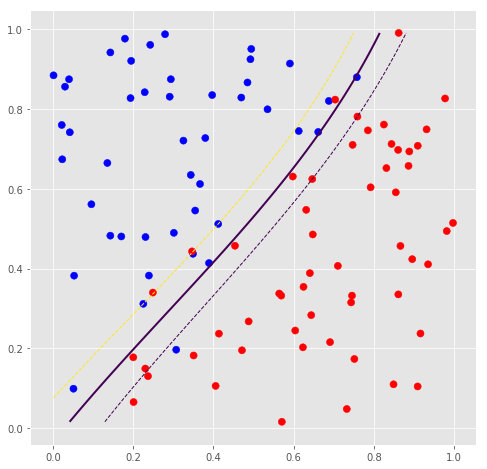

In [12]:
def generate_linear(size=100, k=1.1, b=0.0, nl=0.1):
    print("Generating 'Linearly-separated' data set")

    x = np.random.random((size, 2))
    y = np.zeros(size, dtype=int)
    noise = np.random.randn(size) * nl
    y[x[:, 1] - (k * x[:, 0] + b) > noise] = 1

    return x, y

x, y = generate_linear()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

Generating 'Concentric circles' data set
Trying model SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best model SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), with accuracy 0.939338
Plotting data set points
Plotting decision region


/home/evgenii/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


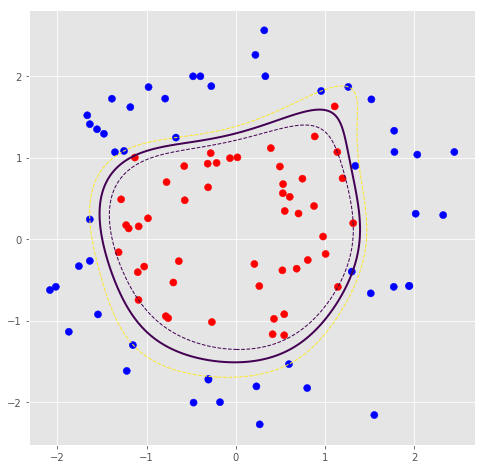

In [13]:
def generate_concentric(size=100, r1=1.0, r2=2.0, sigma=0.3):
    print("Generating 'Concentric circles' data set")
    x = np.zeros((size, 2))
    x[:size//2, 0] = sigma * np.random.randn(size//2) + r1
    x[size//2:, 0] = sigma * np.random.randn(size//2) + r2
    x[:, 1] = (np.random.random(size) - 0.5) * 2 * np.pi
    y = np.hstack([np.zeros(size//2, dtype=int), np.ones(size//2, dtype=int)])

    z = np.zeros((size, 2))
    z[:, 0] = x[:, 0] * np.cos(x[:, 1])
    z[:, 1] = x[:, 0] * np.sin(x[:, 1])

    return z, y

x, y = generate_concentric()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

# Регрессия с SVM

Загрузите набор данных из *titanium.csv*<br/>
Мы будем решать задачу восстановления столбца 'y' по столбцу 'x'.

In [22]:
# Your Code Here
# z - score - normalization, from standart scaler 
from sklearn.preprocessing import StandardScaler
data = pd.read_csv("titanium.csv")

In [18]:
data.head()

,x,y
0,585.0,0.644
1,595.0,0.622
2,605.0,0.638
3,615.0,0.649
4,625.0,0.652


In [48]:
x = StandardScaler().fit_transform(data.x.values.reshape(-1,1))
y = StandardScaler().fit_transform(data.y.values.reshape(-1,1)).ravel()

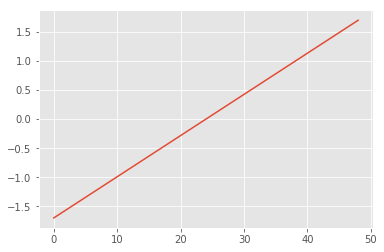

In [49]:
plt.plot(x)
plt.show()

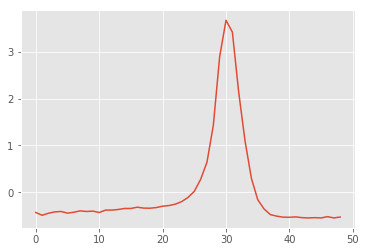

In [50]:
plt.plot(y)
plt.show()

## Обучение моделей

Рассмотрите 3 ядра: 
* Линейное
* Полиномиальное (degree = 3, gamma = 6, coef0 = 1)
* RBF (gamma = 6, coef0 = 1)

Во всех случаях установить ширину трубки `epsilon=0.01`

Для каждого из ядер:
1. Пусть `C = np.logspace(-2, 2, 10)`. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наулучшего параметра $С$ каждого из ядер постройте график с данными и предстазанием по svm

В каких случаях возникает эффекты недообучения, переобучения?

In [51]:
from sklearn.metrics import mean_absolute_error

In [52]:
## Your Code Here

In [60]:
C = np.logspace(-2, 2 , 10)
maes = list()
for c in C:
    svr = SVR(kernel='linear', C=c, epsilon=0.01)
    svr.fit(x,y)
    maes.append(mean_absolute_error(y,svr.predict(x)))


In [61]:
print(maes)

[0.4758593050569533, 0.47587503188460667, 0.47587503200054027, 0.4758750323225861, 0.4758750332208966, 0.4758750357277482, 0.47587504269505565, 0.4758750620807971, 0.4758751160247383, 0.47587526613637626]


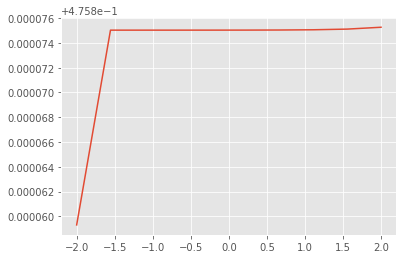

In [54]:
plt.plot(np.log10(C), maes)
plt.show()

In [55]:
C = np.logspace(-2, 2 , 10)
maes = list()
for c in C:
    svr = SVR(kernel='poly', C=c, epsilon=0.01, degree = 3, gamma = 6, coef0 = 1)
    svr.fit(x,y)
    maes.append(mean_absolute_error(y,svr.predict(x)))

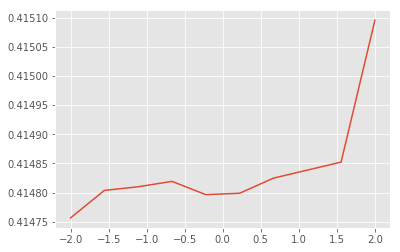

In [47]:
plt.plot(np.log10(C), maes)
plt.show()

In [58]:
C = np.logspace(-2, 2 , 10)
maes = list()
for c in C:
    svr = SVR(kernel='rbf', C=c, epsilon=0.01, gamma = 6, coef0 = 1)
    svr.fit(x,y)
    maes.append(mean_absolute_error(y,svr.predict(x)))

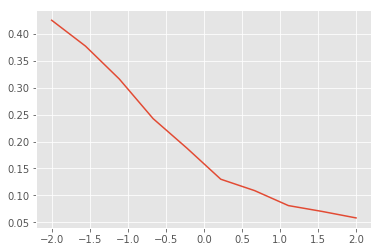

In [59]:
plt.plot(np.log10(C), maes)
plt.show()